IMPORTING LIBRARIES

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns   #visualization
from seaborn import pairplot
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.correlation import plot_corr
import matplotlib.pyplot as plt #visualization
%matplotlib inline 
sns.set(color_codes=True)

IMPORTING AND DISPLAYING OF DATA

In [2]:
#importing test datasets
df_test = pd.read_csv('~/Documents/GitHub/EDSA_ZM-Team1/test_set.csv')

#To display the top 5 rows
df_test.head()

Index              Province Container Size_Grade  Weight_Kg  \
0      1  W.CAPE-BERGRIVER ETC     EC120         1M       12.0   
1      2  W.CAPE-BERGRIVER ETC     M4183         1X       18.3   
2      3  W.CAPE-BERGRIVER ETC     EC120         1S       12.0   
3      4  W.CAPE-BERGRIVER ETC     M4183         1M       18.3   
4      5  W.CAPE-BERGRIVER ETC     M4183         1L       18.3   

              Commodities        Date  Low_Price  High_Price  Sales_Total  \
0  APPLE GOLDEN DELICIOUS  2020-07-09      128.0       136.0       5008.0   
1  APPLE GOLDEN DELICIOUS  2020-01-20      220.0       220.0       1760.0   
2  APPLE GOLDEN DELICIOUS  2020-08-19      120.0       120.0        720.0   
3  APPLE GOLDEN DELICIOUS  2020-05-06      160.0       160.0        160.0   
4  APPLE GOLDEN DELICIOUS  2020-05-04      140.0       160.0      14140.0   

   Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  
0              38          456.0              0  
1               8          146.4              2  
2               6           72.0             45  
3               1           18.3              8  
4             100         1830.0             19

In [3]:
#importing train datasets
df_train= pd.read_csv('~/Documents/GitHub/EDSA_ZM-Team1/train_set.csv')

#To display the top 5 rows
df_train.head()

Province Container Size_Grade  Weight_Kg             Commodities  \
0               CAPE     EC120         1L       12.0      APPLE GRANNY SMITH   
1               CAPE     M4183         1L       18.3  APPLE GOLDEN DELICIOUS   
2            GAUTENG     AT200         1L       20.0       AVOCADO PINKERTON   
3          TRANSVAAL     BJ090         1L        9.0      TOMATOES-LONG LIFE   
4  WESTERN FREESTATE     PP100         1R       10.0   POTATO SIFRA (WASHED)   

         Date  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0  2020-03-10      108.0       112.0       3236.0              29   
1  2020-09-09      150.0       170.0      51710.0             332   
2  2020-05-05       70.0        80.0       4860.0              66   
3  2020-01-20       60.0        60.0        600.0              10   
4  2020-07-14       40.0        45.0      41530.0             927   

   Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
0          348.0              0              9.30  
1         6075.6            822              8.51  
2         1320.0             50              3.68  
3           90.0              0              6.67  
4         9270.0            393              4.48

In [4]:
test=df_test[df_test['Commodities']=='APPLE GOLDEN DELICIOUS']
test.head()

Index              Province Container Size_Grade  Weight_Kg  \
0      1  W.CAPE-BERGRIVER ETC     EC120         1M       12.0   
1      2  W.CAPE-BERGRIVER ETC     M4183         1X       18.3   
2      3  W.CAPE-BERGRIVER ETC     EC120         1S       12.0   
3      4  W.CAPE-BERGRIVER ETC     M4183         1M       18.3   
4      5  W.CAPE-BERGRIVER ETC     M4183         1L       18.3   

              Commodities        Date  Low_Price  High_Price  Sales_Total  \
0  APPLE GOLDEN DELICIOUS  2020-07-09      128.0       136.0       5008.0   
1  APPLE GOLDEN DELICIOUS  2020-01-20      220.0       220.0       1760.0   
2  APPLE GOLDEN DELICIOUS  2020-08-19      120.0       120.0        720.0   
3  APPLE GOLDEN DELICIOUS  2020-05-06      160.0       160.0        160.0   
4  APPLE GOLDEN DELICIOUS  2020-05-04      140.0       160.0      14140.0   

   Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  
0              38          456.0              0  
1               8          146.4              2  
2               6           72.0             45  
3               1           18.3              8  
4             100         1830.0             19

In [5]:
train=df_train[df_train['Commodities']=='APPLE GOLDEN DELICIOUS']
train.head()

Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities        Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS  2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS  2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS  2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS  2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS  2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
1              332         6075.6            822              8.51  
7              320         3520.0              0              4.55  
24              18          162.0           1506              6.11  
40             388         7100.4            443              4.51  
69               1          400.0              2              4.50

In [6]:
train['Province'].replace('NATAL','KWA-ZULU NATAL',inplace=True)
train.head()

C:\Users\Emanuel\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities        Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS  2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS  2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS  2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS  2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS  2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
1              332         6075.6            822              8.51  
7              320         3520.0              0              4.55  
24              18          162.0           1506              6.11  
40             388         7100.4            443              4.51  
69               1          400.0              2              4.50

In [7]:
train['Province'].replace('CAPE','SOUTHERN CAPE',inplace=True)
train.head()

C:\Users\Emanuel\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Province Container Size_Grade  Weight_Kg  \
1          SOUTHERN CAPE     M4183         1L       18.3   
7          SOUTHERN CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40         SOUTHERN CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities        Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS  2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS  2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS  2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS  2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS  2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
1              332         6075.6            822              8.51  
7              320         3520.0              0              4.55  
24              18          162.0           1506              6.11  
40             388         7100.4            443              4.51  
69               1          400.0              2              4.50

BASIC DATA ANALYSIS

In [8]:
#confirming the data shapes for both the train and test
train.shape , test.shape

((1952, 13), (685, 13))

The shape command shows us that we have :
- 1952 rows of data and 13 features for the train dataset.
- 685 rows and 13 features for the test dataset.


Checking for nulls in the datasets

In [9]:
print(train.isnull().sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64


In [10]:
print(test.isnull().sum())

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64


This confirms that there are no nulls in both the test and train datasets.

Checking DataTypes

In [11]:
train.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Date                 object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
dtype: object

In [12]:
test.dtypes

Index               int64
Province           object
Container          object
Size_Grade         object
Weight_Kg         float64
Commodities        object
Date               object
Low_Price         float64
High_Price        float64
Sales_Total       float64
Total_Qty_Sold      int64
Total_Kg_Sold     float64
Stock_On_Hand       int64
dtype: object

- It can be observered from the above columns and data types that they have been properly stored
- Numeric columns are in int64 and float64 whereas textual/Categorical columns are in object data types columns
- This, thus confirms the data types for both the train and test as there is no need for changing data types for any column

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 74.9+ KB


Using the info() and dtypes()commands, we can confirm our categorical and numerical features. This further displays the number of null count in the columns.

DESCRIPTIVE STATICTICS OF EACH FEATURE IN THE DATASETS

In [15]:
test.describe()

Index   Weight_Kg    Low_Price   High_Price    Sales_Total  \
count  685.000000  685.000000   685.000000   685.000000     685.000000   
mean   343.000000   34.142482   164.202891   195.590073   18788.111212   
std    197.886752   87.575995   355.167319   389.109476   33951.586813   
min      1.000000    3.000000    10.000000    10.000000      10.000000   
25%    172.000000    9.000000    50.000000    64.000000    1300.000000   
50%    343.000000   12.000000    80.000000   112.000000    5520.000000   
75%    514.000000   18.300000   128.000000   160.000000   21176.000000   
max    685.000000  400.000000  2400.000000  2400.000000  308010.000000   

       Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  
count      685.000000     685.000000     685.000000  
mean       174.883212    2725.402336     439.245255  
std        299.351142    5059.123311     715.985761  
min          1.000000       6.300000       0.000000  
25%         13.000000     204.000000      20.000000  
50%         62.000000     860.100000     153.000000  
75%        200.000000    3033.000000     516.000000  
max       2774.000000   47200.000000    6827.000000

In [16]:
train.describe()

Weight_Kg    Low_Price   High_Price    Sales_Total  Total_Qty_Sold  \
count  1952.000000  1952.000000  1952.000000    1952.000000     1952.000000   
mean     40.460912   174.307377   215.648053   20053.533811      174.510758   
std      99.655169   373.553578   433.546159   39005.069445      308.810797   
min       3.000000     2.000000     5.000000       5.000000        1.000000   
25%       9.000000    50.000000    60.000000    1325.000000       12.000000   
50%      12.000000    80.000000   108.000000    5495.000000       64.000000   
75%      18.300000   127.250000   160.000000   21082.500000      200.000000   
max     400.000000  2300.000000  3300.000000  369464.000000     4237.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
count    1952.000000    1952.000000       1952.000000  
mean     2960.176332     408.393955          6.778893  
std      6097.416527     724.450582          2.248744  
min         3.000000       0.000000          0.250000  
25%       219.600000       9.000000          5.460000  
50%       853.500000     126.500000          6.670000  
75%      3093.525000     468.000000          8.280000  
max     74000.000000    6400.000000         21.240000

In [17]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight_Kg               9.300
Low_Price              77.250
High_Price            100.000
Sales_Total         19757.500
Total_Qty_Sold        188.000
Total_Kg_Sold        2873.925
Stock_On_Hand         459.000
avg_price_per_kg        2.820
dtype: float64


In [17]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Index               342.0
Weight_Kg             9.3
Low_Price            78.0
High_Price           96.0
Sales_Total       19876.0
Total_Qty_Sold      187.0
Total_Kg_Sold      2829.0
Stock_On_Hand       496.0
dtype: float64


MEASURE OF OUTLIERS PRESENT IN THE DATA

In [18]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

In [19]:
test.kurtosis()

Index             -1.200000
Weight_Kg         13.611804
Low_Price         20.126362
High_Price        17.610473
Sales_Total       19.626133
Total_Qty_Sold    19.531658
Total_Kg_Sold     24.423404
Stock_On_Hand     14.868371
dtype: float64

Indicates a lack to minimal number of outliers for all features

OBTAINING HOW SYMMETRICAL THE DATASETS ARE

In [20]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

The skew values calculated are above 1 which indicates that the data has a High Postive Skew except for avg_price_per_kg which has a skew value of 0.08 which indicates a Moderate Positive Skew.

In [21]:
test.skew()

Index             0.000000
Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64

The skew values calculated are above 1 which indicates that the data has a High Postive Skew except for Index which has a skew value of 0 which indicates that it has a Moderate Positive Skew.

In [22]:
# Rows containing duplicate data on train data
duplicate_rows_df = train[train.duplicated()]
print('duplicate rows: ', duplicate_rows_df.shape)

duplicate rows:  (0, 13)


In [23]:
# Rows containing duplicate data on test data
duplicate_rows_df = test[test.duplicated()]
print('duplicate rows: ', duplicate_rows_df.shape)

duplicate rows:  (0, 13)


- It can be observered that there exist zero (0) number of duplicate rows in our data, this implies that no row will be removed in the name of duplicate

**DATA VISUALIZATION**

Histogram And Density Plot

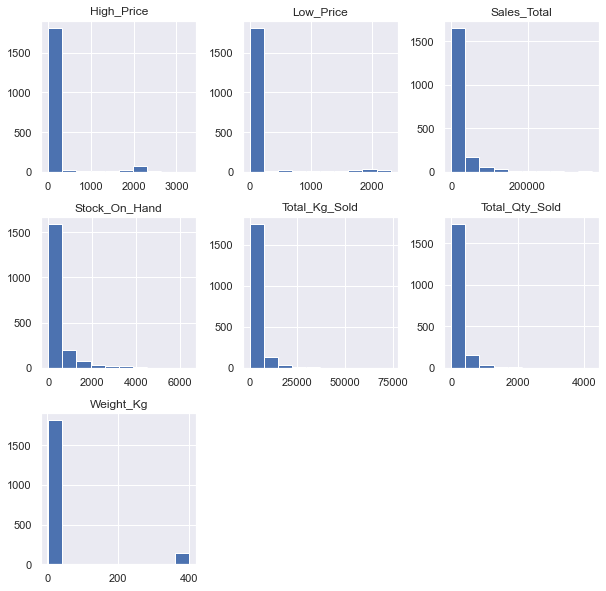

In [24]:
features = ['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']  
train[features].hist(figsize=(10,10));

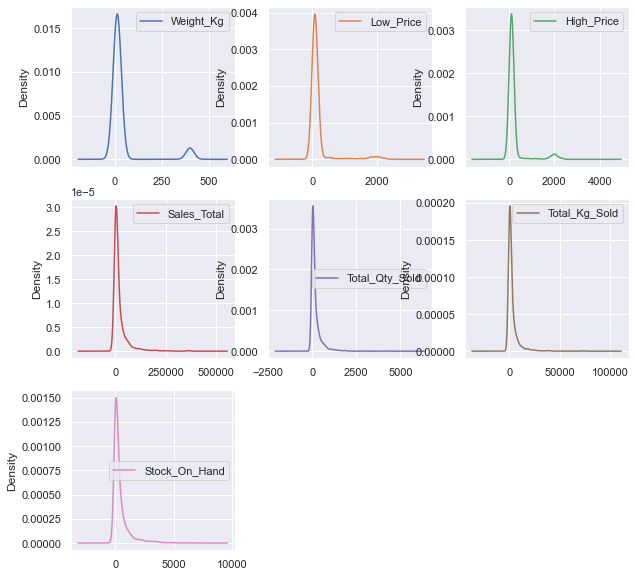

In [25]:
train[features].plot(kind='density',subplots=True, layout=(3,3), sharex=False, figsize=(10,10));

Correlation Coefficient Values

Weight_Kg  Low_Price  High_Price  Sales_Total  \
Weight_Kg          1.000000   0.863182    0.905852     0.180518   
Low_Price          0.863182   1.000000    0.938140     0.183230   
High_Price         0.905852   0.938140    1.000000     0.265672   
Sales_Total        0.180518   0.183230    0.265672     1.000000   
Total_Qty_Sold    -0.133317  -0.122823   -0.096456     0.771865   
Total_Kg_Sold      0.294117   0.269744    0.372282     0.962338   
Stock_On_Hand     -0.144105  -0.127677   -0.094174     0.284693   
avg_price_per_kg  -0.337886  -0.141740   -0.164496     0.108473   

                  Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  \
Weight_Kg              -0.133317       0.294117      -0.144105   
Low_Price              -0.122823       0.269744      -0.127677   
High_Price             -0.096456       0.372282      -0.094174   
Sales_Total             0.771865       0.962338       0.284693   
Total_Qty_Sold          1.000000       0.651440       0.390168   
Total_Kg_Sold           0.651440       1.000000       0.229062   
Stock_On_Hand           0.390168       0.229062       1.000000   
avg_price_per_kg        0.087536      -0.001007       0.105028   

                  avg_price_per_kg  
Weight_Kg                -0.337886  
Low_Price                -0.141740  
High_Price               -0.164496  
Sales_Total               0.108473  
Total_Qty_Sold            0.087536  
Total_Kg_Sold            -0.001007  
Stock_On_Hand             0.105028  
avg_price_per_kg          1.000000

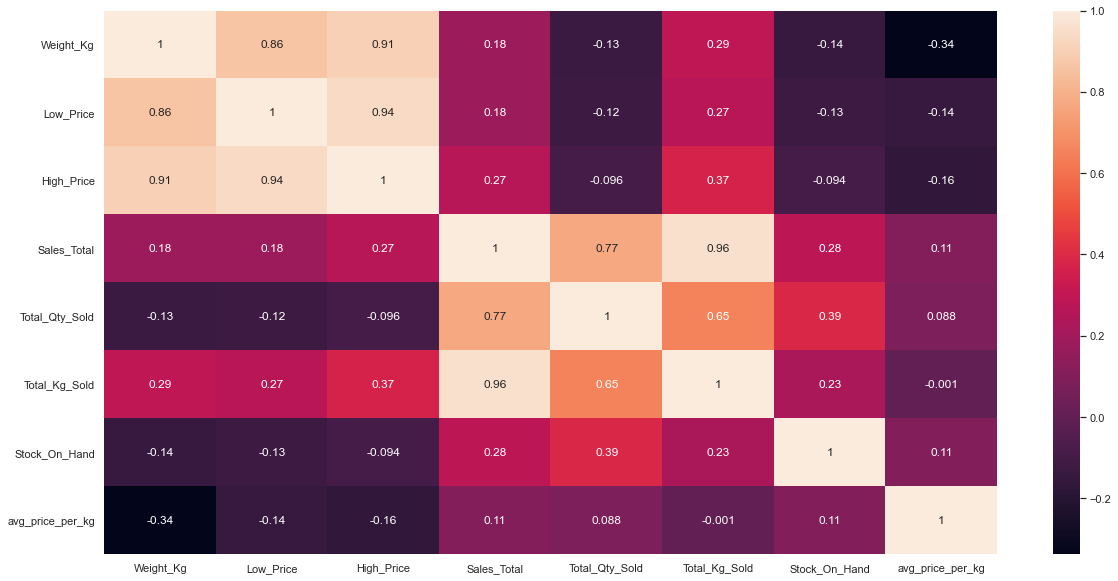

In [33]:
plt.figure(figsize=(20,10))
correlation= train.corr()
sns.heatmap(correlation,annot=True)
correlation

- Weight_kg and Low_Price =0.86 (Strong Positive Correlation)
- Weight_kg and High_Price=0.91(Strong Positive Correlation)
- Weight_kg and avg_price_per_kg=-0.34(Weak Negative Correlation)
- High_price and Sales_Total=0.27(Weak Positive Correlation)
- Low_Price and Sales_Total=0.18(Weak Positive Correlation)
- Total_kg_Sold and Sales_Total=0.77 (Moderate Positive Correlation)

Scatter Plots

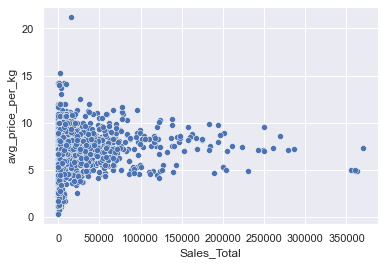

In [34]:
sns.scatterplot(x='Sales_Total',y='avg_price_per_kg',data=train);

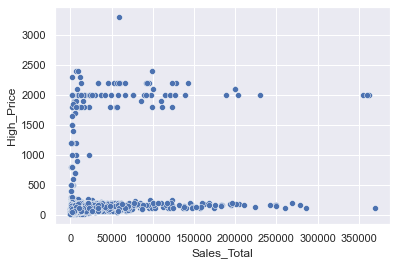

In [35]:
sns.scatterplot(y='High_Price',x='Sales_Total',data=train);

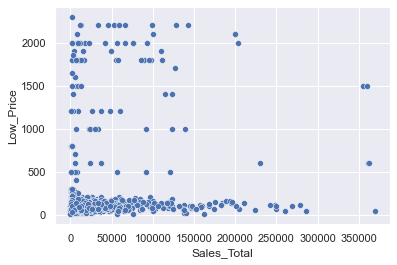

In [36]:
sns.scatterplot(y='Low_Price',x='Sales_Total',data=train);

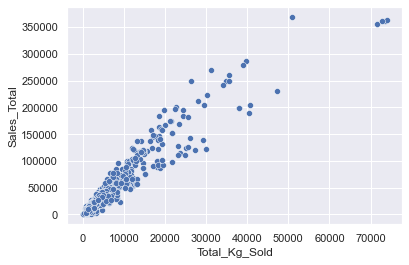

In [37]:
sns.scatterplot(x='Total_Kg_Sold',y='Sales_Total',data=train);

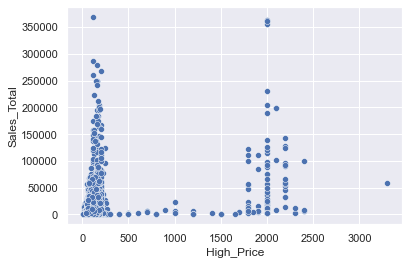

In [38]:
sns.scatterplot(x='High_Price',y='Sales_Total',data=train);

Joint Plots

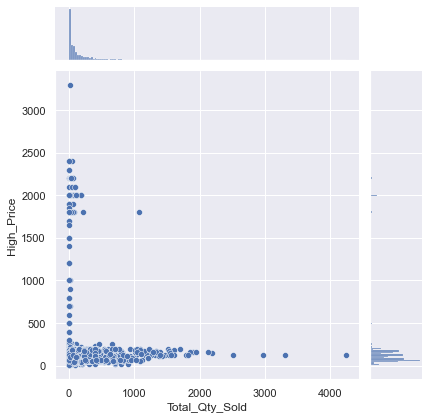

In [39]:
sns.jointplot(y = 'High_Price', x = 'Total_Qty_Sold', data = train);

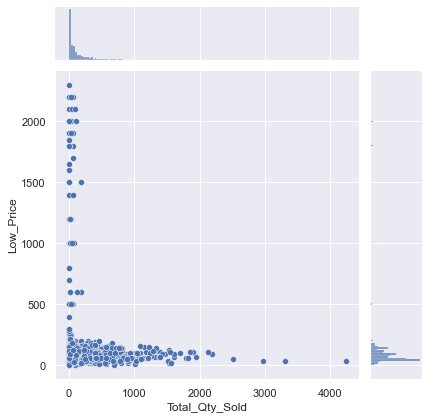

In [40]:
sns.jointplot(y = 'Low_Price', x = 'Total_Qty_Sold', data = train);

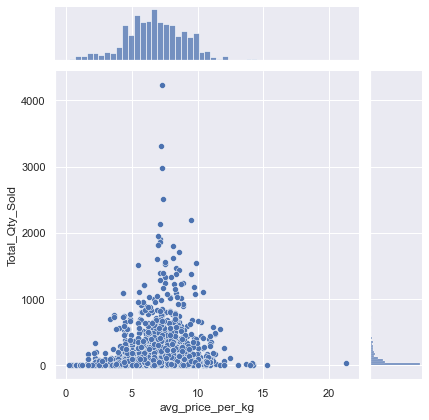

In [41]:
sns.jointplot(y = 'Total_Qty_Sold', x = 'avg_price_per_kg', data = train);

Box Plot and Violin Plot

<AxesSubplot:xlabel='avg_price_per_kg'>

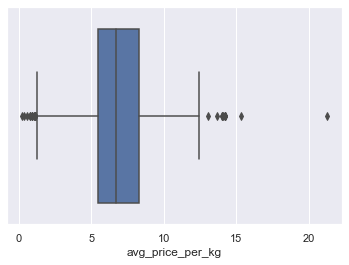

In [42]:
sns.boxplot(x=train['avg_price_per_kg'])

<AxesSubplot:xlabel='Sales_Total'>

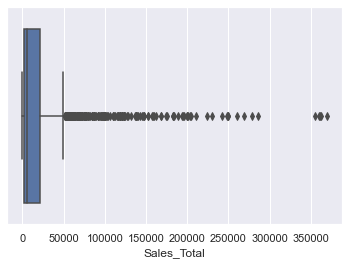

In [43]:
sns.boxplot(x=train['Sales_Total'])

In [44]:
sns.violinplot(x='avg_price_per_kg', data=train);

In [45]:
sns.violinplot(x='Sales_Total', data=train);

Bar Plot

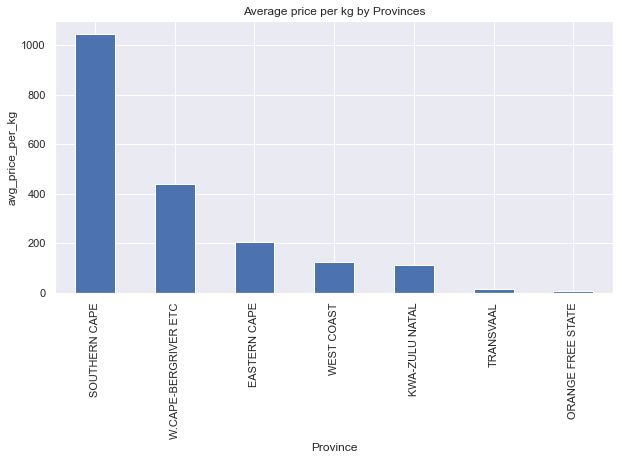

In [46]:
train.Province.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Average price per kg by Provinces')
plt.ylabel('avg_price_per_kg')
plt.xlabel('Province');

In [41]:
#Lerato use from here onwards
#import pandas as pd
#import numpy as np
#loading train and test set
#train = pd.read_csv('C:/Users/tamak/Desktop/Data Science/Predicts/EDSA_ZM-Team1/train_set.csv')
#test = pd.read_csv('C:/Users/tamak/Desktop/Data Science/Predicts/EDSA_ZM-Team1/test_set.csv')

In [47]:
#converting all categorical variable features to dummy variables:

#creating a copy of train to work on so as to not overwrite origional train set data - only for golden apples
model_train = train.loc[train['Commodities'] == 'APPLE GOLDEN DELICIOUS'].copy()

model_train =  pd.get_dummies(model_train, drop_first = True, columns=['Province'])
model_train =  pd.get_dummies(model_train, drop_first = True, columns=['Container'])
model_train =  pd.get_dummies(model_train, drop_first = True, columns=['Size_Grade'])
#model_train =  pd.get_dummies(model_train, drop_first = True, columns=['Commodities'])
model_train = model_train.drop('Commodities',axis=1)
model_train = model_train.drop('Date',axis=1)

#creating a copy of test to work on so as to not overwrite origional test set data - only for golden apples
model_test = test.loc[test['Commodities'] == 'APPLE GOLDEN DELICIOUS'].copy()

model_test =  pd.get_dummies(model_test, drop_first = True, columns=['Province'])
model_test =  pd.get_dummies(model_test, drop_first = True, columns=['Container'])
model_test =  pd.get_dummies(model_test, drop_first = True, columns=['Size_Grade'])
#model_test =  pd.get_dummies(model_test, drop_first = True, columns=['Commodities'])
model_test = model_test.drop('Commodities',axis=1)
model_test = model_test.drop('Date',axis=1)

model_train

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
1           18.3      150.0       170.0      51710.0             332   
7           11.0       50.0        50.0      16000.0             320   
24           9.0       55.0        55.0        990.0              18   
40          18.3       80.0       120.0      32020.0             388   
69         400.0     1800.0      1800.0       1800.0               1   
...          ...        ...         ...          ...             ...   
64276       12.0       96.0        96.0       1920.0              20   
64291       18.3      130.0       130.0       7280.0              56   
64297        9.0       50.0        60.0       4540.0              89   
64304       11.0       30.0        40.0       2140.0              70   
64310       12.0       88.0       104.0       9960.0             109   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  \
1             6075.6            822              8.51   
7             3520.0              0              4.55   
24             162.0           1506              6.11   
40            7100.4            443              4.51   
69             400.0              2              4.50   
...              ...            ...               ...   
64276          240.0             53              8.00   
64291         1024.8             74              7.10   
64297          801.0            793              5.67   
64304          770.0              0              2.78   
64310         1308.0             67              7.61   

       Province_KWA-ZULU NATAL  Province_ORANGE FREE STATE  ...  \
1                            0                           0  ...   
7                            0                           0  ...   
24                           0                           0  ...   
40                           0                           0  ...   
69                           0                           0  ...   
...                        ...                         ...  ...   
64276                        1                           0  ...   
64291                        0                           1  ...   
64297                        0                           0  ...   
64304                        0                           0  ...   
64310                        0                           0  ...   

       Container_M9125  Size_Grade_1M  Size_Grade_1S  Size_Grade_1U  \
1                    0              0              0              0   
7                    0              0              0              0   
24                   0              0              0              0   
40                   0              0              1              0   
69                   0              0              1              0   
...                ...            ...            ...            ...   
64276                0              0              1              0   
64291                0              0              0              0   
64297                0              0              0              0   
64304                0              0              0              0   
64310                0              1              0              0   

       Size_Grade_1X  Size_Grade_2L  Size_Grade_2M  Size_Grade_2S  \
1                  0              0              0              0   
7                  0              0              1              0   
24                 0              0              0              1   
40                 0              0              0              0   
69                 0              0              0              0   
...              ...            ...            ...            ...   
64276              0              0              0              0   
64291              1              0              0              0   
64297              0              0              1              0   
64304              0              0              1              0   
64310              0              0     

In [48]:
#importing libraries from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
import math

y = model_train.avg_price_per_kg # defining label
x = model_train.drop('avg_price_per_kg',axis=1) # defining features

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=1) # creating train-test-split

model_lr = LinearRegression() # linear regression model
model_lr.fit(x_train, y_train) 

model_las = Lasso(alpha=1.0) # lasso model
model_las.fit(x, y)

model_ridge = Ridge(alpha=1.0) # ridge model
model_ridge.fit(x, y)

Ridge()

In [49]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "Linear": metrics.mean_squared_error(y_train, model_lr.predict(x_train)),
                        "Lasso": metrics.mean_squared_error(y_train, model_las.predict(x_train)),
                        "Ridge": metrics.mean_squared_error(y_train, model_ridge.predict(x_train))
                    },
                'Test MSE':
                    {
                        "Linear": metrics.mean_squared_error(y_test, model_lr.predict(x_test)),
                        "Lasso": metrics.mean_squared_error(y_test, model_las.predict(x_test)),
                        "Ridge": metrics.mean_squared_error(y_test, model_ridge.predict(x_test))
                    },
                'Test RMSE':
                    {
                        "Linear": math.sqrt(metrics.mean_squared_error(y_test, model_lr.predict(x_test))),
                        "Lasso": math.sqrt(metrics.mean_squared_error(y_test, model_las.predict(x_test))),
                        "Ridge": math.sqrt(metrics.mean_squared_error(y_test, model_ridge.predict(x_test)))
                    },
                'R-Squared':
                    {
                        "Linear": metrics.r2_score(y_test, model_lr.predict(x_test)),
                        "Lasso": metrics.r2_score(y_test, model_las.predict(x_test)),
                        "Ridge": metrics.r2_score(y_test, model_ridge.predict(x_test))
                    }
                }

# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

results_df

Training MSE  Test MSE  Test RMSE  R-Squared
Linear      2.063801  1.618323   1.272133   0.637320
Lasso       3.265428  2.889144   1.699748   0.352519
Ridge       2.075502  1.554345   1.246734   0.651659

In [51]:
# import graphing library
import matplotlib.pyplot as plt


Inspect coefficients on the predictions of the model

In [52]:
# extract model intercept
beta_0 = float(model_lr.intercept_)
# extract model coeffs
beta_js = pd.DataFrame(model_lr.coef_, x.columns, columns=['Coefficient'])
print("Intercept:", beta_0)

Intercept: 2121939.783657559


In [53]:
beta_js

Coefficient
Weight_Kg                     -7.073114e+05
Low_Price                      5.614072e-04
High_Price                     1.479617e-03
Sales_Total                    6.839345e-05
Total_Qty_Sold                -2.209685e-03
Total_Kg_Sold                 -3.523820e-04
Stock_On_Hand                 -1.200926e-04
Province_KWA-ZULU NATAL       -3.551362e-01
Province_ORANGE FREE STATE    -5.448037e-01
Province_SOUTHERN CAPE         1.486668e+00
Province_TRANSVAAL             8.685945e-01
Province_W.CAPE-BERGRIVER ETC  1.839757e+00
Province_WEST COAST            1.096445e+00
Container_DT063                2.334129e+06
Container_EC120                6.365804e+06
Container_EF120                6.365804e+06
Container_EG140                7.780427e+06
Container_IA400                2.808026e+08
Container_JE090                4.243869e+06
Container_JG110                5.658491e+06
Container_M4183                1.082186e+07
Container_M6125                6.719459e+06
Container_M9125                6.719457e+06
Size_Grade_1M                 -4.855373e-01
Size_Grade_1S                 -8.518312e-01
Size_Grade_1U                 -2.979444e+00
Size_Grade_1X                  3.914416e-01
Size_Grade_2L                 -1.655609e+00
Size_Grade_2M                 -1.481676e+00
Size_Grade_2S                 -2.083639e+00
Size_Grade_2U                 -2.760444e+00
Size_Grade_2X                 -2.067827e+00

2-dimensional plots

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(model_train['Weight_Kg'], model_train['avg_price_per_kg'])
axs[0,0].plot(model_train['Weight_Kg'], model_lr.intercept_ + model_lr.coef_[4]*model_train['Weight_Kg'], color='red')
axs[0,0].title.set_text('Weight_Kg (wt) vs. avg_price_per_kg')

axs[0,1].scatter(model_train['High_Price'], model_train['avg_price_per_kg'])
axs[0,1].plot(model_train['High_Price'], model_lr.intercept_ + model_lr.coef_[1]*model_train['High_Price'], color='red')
axs[0,1].title.set_text('High_Price (hp) vs. avg_price_per_kg')

axs[1,0].scatter(model_train['Total_Kg_Sold'], model_train['avg_price_per_kg'])
axs[1,0].plot(model_train['Total_Kg_Sold'], model_lr.intercept_ + model_lr.coef_[0]*model_train['Total_Kg_Sold'], color='red')
axs[1,0].title.set_text('Total_Kg_Sold (tks) vs. avg_price_per_kg')

axs[1,1].scatter(model_train['Low_Price'], model_train['avg_price_per_kg'])
axs[1,1].plot(model_train['Low_Price'], model_lr.intercept_ + model_lr.coef_[2]*model_train['Low_Price'], color='red')
axs[1,1].title.set_text('Low_Price (lp) vs. avg_price_per_kg')

fig.tight_layout(pad=2.0)

plt.show()


Checking for linearity

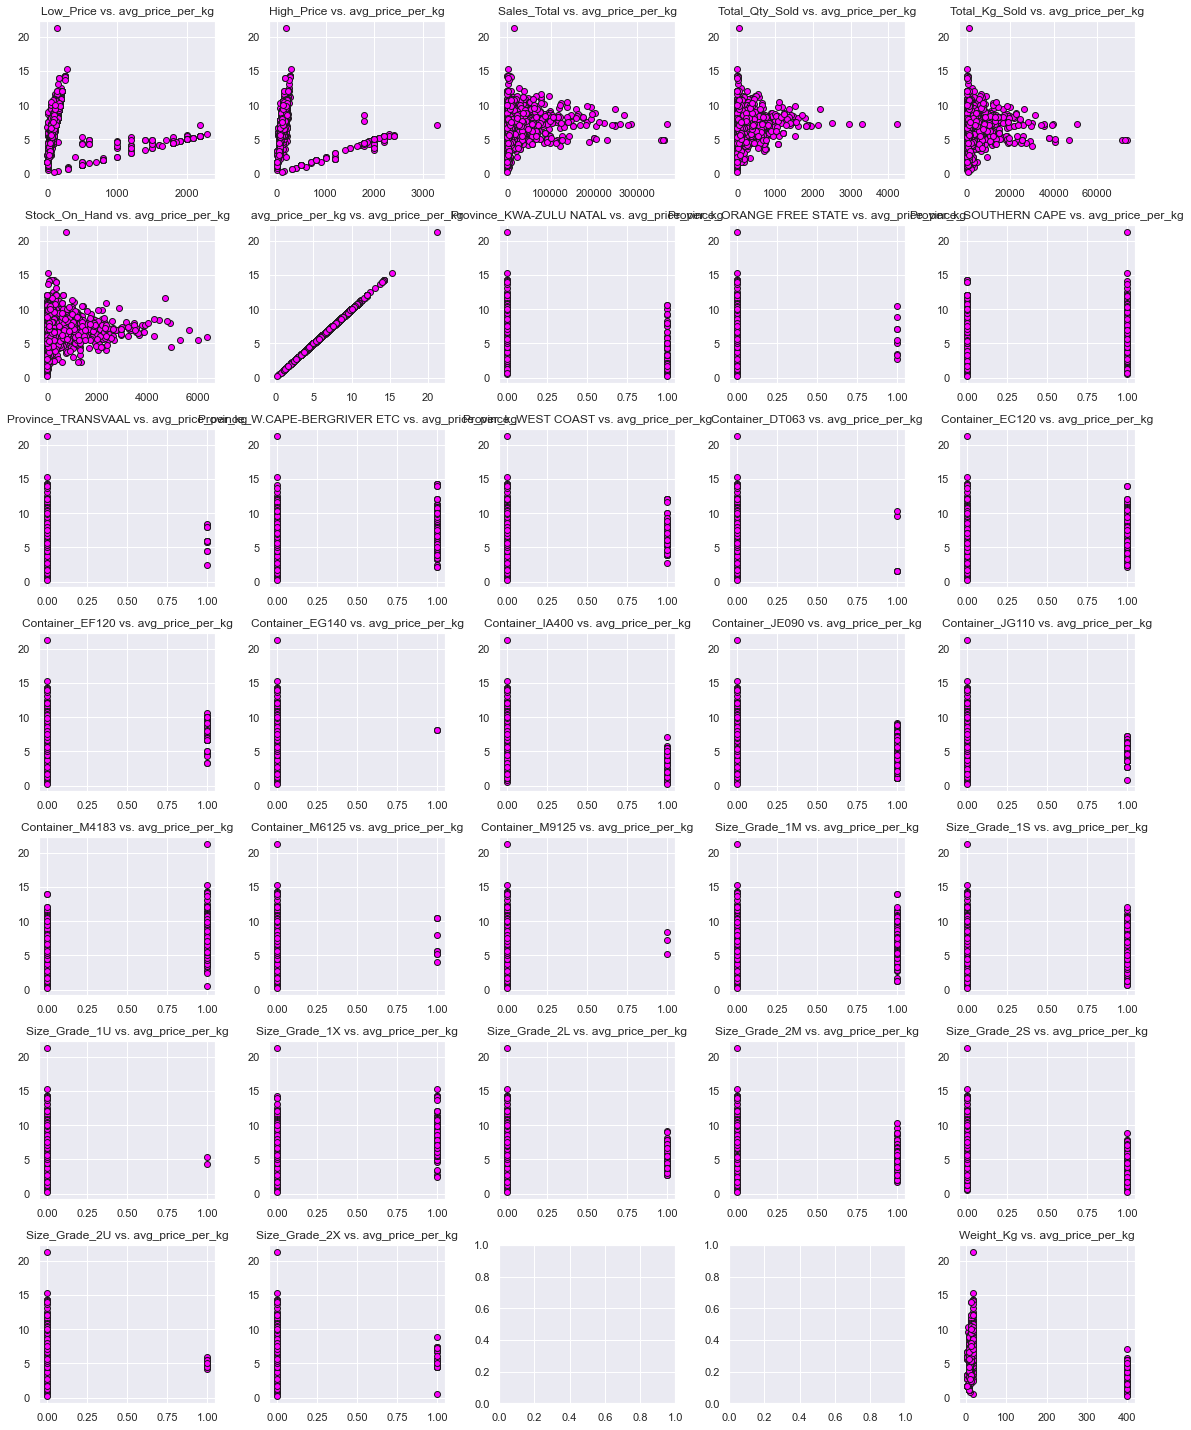

In [77]:
fig, axs = plt.subplots(7,5, figsize=(16,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(model_train.columns):
    axs[index-1].set_title("{} vs. avg_price_per_kg".format(column),fontsize=12)
    axs[index-1].scatter(x=model_train[column],y=model_train['avg_price_per_kg'],color='magenta',edgecolor='k')

fig.tight_layout(pad=1)

In [78]:
model_train1 = model_train.copy()

Correlation heatmap table

In [79]:
# We only compare the predictor variables, and drop the target `avg_price_per_kg` column.
corr = model_train1.drop('avg_price_per_kg', axis='columns').corr()
#fig=plot_corr(corr,xnames=corr.columns)
plt.subplots(figsize=(10,9))
sns.heatmap(corr)

<AxesSubplot:>

    ."Regress y on X"
    .We regress avg_price_per_kg on all of the predictors.

In [80]:
formula_str = model_train1.columns[0]+' ~ '+'+'.join(model_train1.columns[1:]); formula_str


'Weight_Kg ~ Low_Price+High_Price+Sales_Total+Total_Qty_Sold+Total_Kg_Sold+Stock_On_Hand+avg_price_per_kg+Province_KWA-ZULU NATAL+Province_ORANGE FREE STATE+Province_SOUTHERN CAPE+Province_TRANSVAAL+Province_W.CAPE-BERGRIVER ETC+Province_WEST COAST+Container_DT063+Container_EC120+Container_EF120+Container_EG140+Container_IA400+Container_JE090+Container_JG110+Container_M4183+Container_M6125+Container_M9125+Size_Grade_1M+Size_Grade_1S+Size_Grade_1U+Size_Grade_1X+Size_Grade_2L+Size_Grade_2M+Size_Grade_2S+Size_Grade_2U+Size_Grade_2X'

Fitting the model using Statsmodels.OLS

#Come back to it

Ridge Regression Plot

In [81]:
b0 = float(model_ridge.intercept_)
# Extract the model coefficient value
coeff = pd.DataFrame(model_ridge.coef_, x.columns, columns=['Coefficient'])
print("Intercept:", float(b0))

Intercept: 5.634113406305214


In [82]:
coeff

Coefficient
Weight_Kg                        -0.011697
Low_Price                         0.000395
High_Price                        0.001680
Sales_Total                       0.000069
Total_Qty_Sold                   -0.002148
Total_Kg_Sold                    -0.000357
Stock_On_Hand                    -0.000103
Province_KWA-ZULU NATAL          -0.610208
Province_ORANGE FREE STATE       -0.221453
Province_SOUTHERN CAPE            1.417677
Province_TRANSVAAL                0.741608
Province_W.CAPE-BERGRIVER ETC     1.825209
Province_WEST COAST               1.084840
Container_DT063                   0.542057
Container_EC120                   1.455303
Container_EF120                   1.645107
Container_EG140                   1.212341
Container_IA400                  -0.167337
Container_JE090                   0.523273
Container_JG110                   0.074225
Container_M4183                   0.833814
Container_M6125                   0.813763
Container_M9125                  -0.087233
Size_Grade_1M                    -0.372669
Size_Grade_1S                    -0.763755
Size_Grade_1U                    -1.909400
Size_Grade_1X                     0.435884
Size_Grade_2L                    -1.272832
Size_Grade_2M                    -0.970233
Size_Grade_2S                    -1.687261
Size_Grade_2U                    -2.111602
Size_Grade_2X                    -1.613586

    .Respective variable are not in the same scale
    .variables with smaller coefficients are less important as they have suffered more in the shrinkage tradeoff

In [114]:
scaler = StandardScaler()
model_scaled = scaler.fit_transform(x)
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(model_scaled,columns=x.columns)
X_standardise.head()

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0  -0.222433  -0.065087   -0.105317     0.811807        0.510117   
1  -0.295704  -0.332855   -0.382175    -0.103950        0.471248   
2  -0.315779  -0.319467   -0.370639    -0.488870       -0.506948   
3  -0.222433  -0.252525   -0.220674     0.306871        0.691504   
4   3.608756   4.353082    3.655338    -0.468098       -0.562012   

   Total_Kg_Sold  Stock_On_Hand  Province_KWA-ZULU NATAL  \
0       0.511073       0.571070                -0.245547   
1       0.091837      -0.563874                -0.245547   
2      -0.459029       1.515476                -0.245547   
3       0.679187       0.047781                -0.245547   
4      -0.419986      -0.561112                -0.245547   

   Province_ORANGE FREE STATE  Province_SOUTHERN CAPE  ...  Container_M9125  \
0                   -0.068059                0.931634  ...        -0.039233   
1                   -0.068059                0.931634  ...        -0.039233   
2                   -0.068059               -1.073382  ...        -0.039233   
3                   -0.068059                0.931634  ...        -0.039233   
4                   -0.068059               -1.073382  ...        -0.039233   

   Size_Grade_1M  Size_Grade_1S  Size_Grade_1U  Size_Grade_1X  Size_Grade_2L  \
0       -0.44198      -0.612085      -0.032026       -0.30986      -0.255934   
1       -0.44198      -0.612085      -0.032026       -0.30986      -0.255934   
2       -0.44198      -0.612085      -0.032026       -0.30986      -0.255934   
3       -0.44198       1.633760      -0.032026       -0.30986      -0.255934   
4       -0.44198       1.633760      -0.032026       -0.30986      -0.255934   

   Size_Grade_2M  Size_Grade_2S  Size_Grade_2U  Size_Grade_2X  
0      -0.367265      -0.432837      -0.093731      -0.116187  
1       2.722828      -0.432837      -0.093731      -0.116187  
2      -0.367265       2.310338      -0.093731      -0.116187  
3      -0.367265      -0.432837      -0.093731      -0.116187  
4      -0.367265      -0.432837      -0.093731      -0.116187  

[5 rows x 32 columns]

In [120]:
X_standardise.describe().loc['std']

Weight_Kg                        1.000256
Low_Price                        1.000256
High_Price                       1.000256
Sales_Total                      1.000256
Total_Qty_Sold                   1.000256
Total_Kg_Sold                    1.000256
Stock_On_Hand                    1.000256
Province_KWA-ZULU NATAL          1.000256
Province_ORANGE FREE STATE       1.000256
Province_SOUTHERN CAPE           1.000256
Province_TRANSVAAL               1.000256
Province_W.CAPE-BERGRIVER ETC    1.000256
Province_WEST COAST              1.000256
Container_DT063                  1.000256
Container_EC120                  1.000256
Container_EF120                  1.000256
Container_EG140                  1.000256
Container_IA400                  1.000256
Container_JE090                  1.000256
Container_JG110                  1.000256
Container_M4183                  1.000256
Container_M6125                  1.000256
Container_M9125                  1.000256
Size_Grade_1M                    1

NB: The variance within each variable in the data is now equal to one.

In [92]:
#plotting the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[1], index=['2016M01']))
#2016M01

In [97]:
plt.plot(np.arange(len(y)), model_ridge.predict(X_standardise), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()

Plot Scatter for Model,Ridge and Lasso

In [129]:
prediction_lr = model_lr.predict(x_test)
plt.scatter(y_test,prediction_lr,color='green')


There possibly is a linear relationship between the two variables

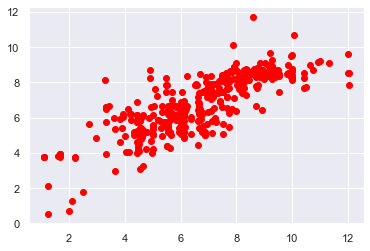

In [130]:
prediction_ridge = model_ridge.predict(x_test)
plt.scatter(y_test,prediction_ridge, color='red')

There possibly is a linear relationship between the two variables

In [123]:
prediction_las = model_las.predict(x_test)
plt.scatter(y_test,prediction_las,color='blue')